In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer

2023-05-18 22:17:15.954060: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-18 22:17:16.207061: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-18 22:17:16.211008: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-18 22:17:17.223558: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# 1. Introduction

In this lab, you will see the power of word embeddings, and how embeddings can be used in different applications.

Summarize the papers that were distributed with the module.

**Efficient Estimation of Word Representations in Vector Space**

The renowned word2vec paper introduces a concept that has now become standard: representing words in a continuous vector space (ranging from 20 to 300 dimensions). This model enables the preservation of linguistic regularities like syntax and semantic differences, and it allows for intriguing operations such as computing analogies using vector addition and cosine similarity. 

The method employed is unsupervised, meaning it only relies on natural language corpora and doesn't necessitate labeled data. This is feasible due to the distributional hypothesis, which posits that words found in similar contexts often carry similar meanings or connotations. The paper investigates several methods with an emphasis on reducing computational complexity. It begins with neural language models (specifically NNLM and the recurrent RNNLM), and then introduces log-linear models such as the continuous bag-of-words (CBOW) and skip-gram.

The vocabulary size in the datasets used for this study can be significantly large, with counts of 30,000, 82,000, and even 1 million words. If managed using a straightforward approach, this can lead to a slowdown in the output layer, creating a bottleneck in the process. To prevent this issue, the authors implemented a technique known as hierarchical softmax. This method arranges the vocabulary into a Huffman binary tree, placing more frequently used words nearer to the root of the tree. This approach effectively reduces the complexity of managing the vocabulary to a logarithmic order, denoted as O(log(V)).

The focus here is on log-linear models, an approach that aims to economize computational resources by eliminating the large fully-connected layers of the Neural Network Language Model (NNLM). It substitutes these with a more straightforward log-linear model to learn word vectors. An NNLM can then be applied on top of these vectors for further training (for more nuanced details, please refer to the original paper).

Two models are discussed. The first one is Continuous Bag of Words (CBOW), which learns by predicting a target word based on the context of 8 surrounding words (4 preceding and 4 following). It's named a bag-of-words model because it averages the 8 context word vectors, effectively disregarding any word order information. The second model, Skip-gram, can be seen as the inverse of CBOW. Given a single word, it aims to predict surrounding words within a certain range (a range randomly selected up to a given limit, say 5). This method seemingly makes better use of the information derived from word proximity as it updates the central word's vector representation using information from several surrounding words.

In tasks related to word associations, the skip-gram method generally outperforms others, although CBOW slightly excels in handling syntactic relationships as compared to semantic ones. When it comes to completing sentences, an RNNLM initiated with skip-gram word vectors proves to be the most effective. The study also provides insights about the training process and parallelization, in addition to demonstrating examples of word pair associations.

**Learning Phrase Representations using RNN Encoder-Decoder for Statistical Machine Translation**


In this paper, the authors introduce a novel RNN Encoder-Decoder model. This model comprises two interconnected recurrent neural networks (RNNs) that are trained in conjunction with each other. The first RNN takes on the role of an encoder, transforming a sequence of symbols into a fixed-length vector representation. Conversely, the second RNN acts as a decoder, converting the fixed-length vector back into a sequence of symbols.

The paper also proposes an innovative type of hidden unit that is capable of adaptively remembering and forgetting, serving as an alternative to the commonly used LSTM unit. A novel neural network architecture is proposed that learns to encode a variable-length sequence into a fixed-length vector representation and to decode a given fixed-length vector representation back into a variable-length sequence.The decoder of the proposed model is another RNN which is trained to generate the output sequence by predicting the next symbol yt given the hidden state h<t>.

The baseline phrase-based SMT system was built using Moses with default settings. This system achieves a BLEU score of 30.64 and 33.3 on the development and test sets, respectively. The proposed RNN Encoder-Decoder uses 1000 hidden units with the proposed gates at the encoder and at the decoder.At each update, 64 randomly selected phrase pairs are used. The model was trained for approximately three days which outperforms baseline.The CSLM model is trained on 7-grams from the target corpus. Each input word was projected into the embedding space R512, and they were concatenated to form a 3072-dimensional vector.The best performance was achieved when using both CSLM and the phrase scores from the RNN Encoder-Decoder. This suggests that the contributions of the CSLM and the RNN Encoder-Decoder are not too correlated. Furthermore, Word Penalization (WP) is used which is to penalize the number of words that are unknown to the neural networks. Quantitive results showed that the source phrases that are long (more than 3 words per source phrase) and frequent are selected. The choices of the target phrases by the RNN Encoder-Decoder are closer to actual or literal translations and the RNN Encoder-Decoder prefers shorter phrases in general. The RNN Encoder–Decoder is able to propose well-formed target phrases without looking at the actual phrase table. Importantly, the generated phrases do not overlap completely with the target phrases from the phrase table.

**Man is to Computer Programmer as Woman is to Homemaker?
Debiasing Word Embeddings**


The study tackles the issue of gender bias in machine learning, arising due to the employment of biased training data, and puts forth a potential solution for rectifying this bias within the model. This review offers a broad synopsis of the study and delves into salient outcomes via the lens of its Python implementation. The authors of the paper used Word Embedding Model to demonstrate gender bias in the training data. The Word Embedding Model was trained on Google News articles and the vector representation of all words were stored in the ‘w2v_gnews_small.txt’ file. The w2v_gnews_small contains words from the Google News articles which are represented as vector in 300 dimensions.

Therefore, if we consider words as vectors, their proximity can be determined using cosine similarity, giving us a way to perceive the semantic likeness between them.The article explores the concept of employing vectors to symbolize words for the purpose of analogy detection. For instance, we're seeking to solve an analogy like "Man is to ? as Woman is to ?". From the perspective of linear algebra, we would calculate the difference between the vectors of Man and Woman, and then look for a pair of vectors whose difference closely matches that of the Man-Woman difference.The pair of vectors whose difference comes closest to this specific difference is most likely to provide the ideal solution to the analogy, which would be "Man is to x as Woman is to y".

The best analogy for Man is to ? as Woman is to ?, is Man is to King as Woman is to Queen. Word Embeddings are powerful to capture variety of relationships in corpus using simple vector arithmetic.However, the authors identify the implicit sexism in the trained data that the word embedding model amplifies. For example, sexist analogies returned by the model are:

- Man is to computer programmer as woman is to homemaker.

- Father is to doctor as mother is to nurse.

Thus, there is implicit gender bias in the Google news articles that word embedding model identifies and potentially exaggerates. The paper discusses how the gender bias in the trained data was evaluated and proposed methods to remove or minimize the gender bias. To quantify bias, the authors compared a word vector to a pair of gender-specific words. Consider the word vector “nurse” and gender-specific pair words of Father-Mother. The distances between the vectors Nurse-Mother and Nurse-Father are computed using cosine similarity. Thus, the embeddings imply that nurse is more feminine and closer to the mother vector. This is incorrect since nurses can be both male or female.

If it is direct bias the gender-neutral words are projected on the gender axis and should, ideally be neutral. If it is skewed towards male or female, then there is gender bias and if it is Indirect bias the gender-neutral words are projected on extreme-she extreme-he profession axis. The paper specifies that debiasing the model, reduced stereotypical analogies (like man=programmer and woman=homemaker) and preserves the usability of the embeddings.

The piece delved into methods for rectifying bias and the measurements used to ascertain its presence in data. Ultimately, it was concluded that Word Embeddings could be employed to detect gender-related associations and bias. Upon recognizing these biases, steps can be taken to eradicate them, thus reducing the propagation of gender bias. It is strongly suggested that the original paper be read, as it is exceptionally well composed.










**Distributed Representations of Words and Phrases and their Compositionality**

This article essentially serves as a mixed bag of various techniques that the authors discovered to enhance their skip-gram model:

By sub-sampling common words, they managed to increase processing speed (roughly 2–10 times faster) and also accuracy when dealing with less common words.
They introduced negative sampling as a less complex replacement to hierarchical softmax.
They proposed a method to identify phrases (for instance, "Canada Air" versus "Canada" and "Air") and process them as individual tokens.
They provided an explanation for word vector addition, which isn't exactly a technique — it seems like it was just an intriguing concept that required some elaboration.

In the skip-gram model Skip-gram model
Objective is to find word representations that are useful for predicting the surrounding words in a sentence or a document. Given a sequence of words 
w
1
,
w
2
,
…
,
w
T
, the Skip-gram model aims to max the average log probability. Larger c results in more training examples and thus can lead to a higher accuracy at the expense of increased training time. The probability 
p
(
w
O
|
w
I
)
 is represented with a softmax.

Negative sampling is a simplified version of a method known as Noise Contrastive Estimation (NCE), developed by Gutmann and Hyvärinen in 2012. The underlying principle is the ability to separate positive instances from negative ones using logistic regression, also known as binary classification, instead of trying to identify the correct class from the entire vocabulary. This approach bypasses the need for hierarchical softmax. To achieve this, the method involves drawing samples 'k' times from a "noise distribution" across the vocabulary, then training the model to select the right word. While the number 'k' varied from approximately 2 to 20, larger values were used for smaller data sets. Although NCE uses the numerical probabilities of the noise distribution for statistical assurances, it was found that the simpler approach of negative sampling was adequate. An interesting observation was the use of the unigram distribution's ¾ power for negative samples, which empirically outperformed other distributions tested. It is intriguing how this specific distribution was chosen and the steps involved in its selection, considering it's not an intuitive result one would naturally arrive at.

Subsampling frequent words is an idea that, when you think about it, makes perfect sense. For instance, you see the word "the" about ten times more frequently than other words. Wouldn't it be more beneficial to focus on predicting words that are a bit more intriguing? The concept is straightforward, but its actual execution tends to be more complex and engaging. The subsampling approach involves removing training words based on a certain probability. The term 't' represents a threshold (approximately 1e-5) and 'f' stands for the word frequency. It may seem clear-cut, but visualizing this process can be a bit challenging. One thing to note is that when the word frequency is rarer than 't', the term becomes negative, which I interpret as setting the discard probability to zero or below. This ensures we never discard rare words. On the other hand, this method does eliminate common words: for instance, 99% of words with an f value of 0.1 and 90% with an f value of 0.001. The paper's authors maintain that this method keeps the frequency ranking intact.

The authors of the cited study adopted a straightforward, yet effective method. This approach scans the training data and assigns scores to bigrams - pairs of words that occur together - based on the ratio of the bigram occurrence to the individual word counts, factoring in a variable discount rate to prevent the grouping of rare words that occur adjacently. If a bigram scores beyond a set threshold, it's merged into a single unit. You might question, doesn't this limit us to phrases composed of only two words? Indeed, it does. However, the procedure can be repeated multiple times, which has proven to be quite effective in practice. For instance, "San Jose" becomes "San Jose Mercury News", and "Cincinnati" transforms into "Cincinnati Enquirer". More impressively, "Belgium" is associated with "Brussels Airlines", and "Greece" with "Aegean Airlines".


**Improving Distributional Similarity with Lessons Learned from Wrod Embeddings**


The use of neural networks for word embedding, such as Skipgram, appears to surpass conventional count-based distributional models in performance. However, this study suggests that the current dominance of word2vec isn't necessarily due to the inherent superiority of the algorithm itself, but rather a result of effective system design decisions and optimizations of hyperparameters.

The conventional technique for word representation is count-based representation, often referred to as the "bag-of-contexts" approach. This method involves counting the times two words appear together within a specific window, creating a sparse matrix M, where the rows represent vocabulary words, and the columns represent context. A commonly used metric for this association is pointwise mutual information (PMI). However, PMI can result in negative values, so a modified version, called positive PMI (PPMI), is frequently utilized to overcome this issue. Since word representation of count-based model can be too sparse, Singular Value Decomposition(SVD) is used on PPMI matrix to reduce the dimension.

In the study, the author analyzed different parameters for PPMI, SVD, SGNS (Skip-gram with negative sampling), and GloVe, adjusting these variables to understand their impacts. The parameters were classified into three categories: hyperparameters used during the pre-processing stage, those utilized in the association metric calculation, and ones applied during the post-processing phase. The pre-processing parameters included dynamic context window (dyn), subsampling (sub), and the removal of infrequent words (del). The association metric hyperparameters were Shifted PMI (neg) and context distribution smoothing (cds). Lastly, the post-processing hyperparameters included the addition of context vectors (w+c), eigenvalue weighting (eig), and vector normalization (nrm).

This study meticulously listed all conceivable hyperparameter options for every embedding technique. The efficacy of each embedding was evaluated based on two distinct tasks. The task of word similarity was examined using datasets such as WordSim Similarity, WordSim Relatedness, MEN, Mechanical Turk, Rare Words, and SimLex-999. The task of word analogy was evaluated using the MSR and Google's analogy dataset, with two different metrics employed, namely 3CosAdd and 3CosMul.

The key finding indicated that no specific algorithm was consistently superior to the rest. The effectiveness of each algorithm fluctuated depending on the datasets used and the arrangement of hyperparameters. The paper provided useful setups and valuable advice for practical applications.






# 2. GloVe

We will first read imdb movie reviews to train a GloVe embeddings.

GloVe is computed from a co-occurrence matrix $X$ as follows:

$
J = \sum_{i=1,j=1}^{V,V} f(X_{ij}) (w_i^T w_j + b_i + b_j - log(X_{ij}))^2
$

$f(X_{ij}) = (X_{ij} / X_{\max})^\alpha$ if $X_{ij} < X_{\max}$; otherwise it is $1$.

$
\nabla_{w_i} J = f(X_{ij}) w_j (w_i^T w_j + b_i + b_j - log(X_{ij}))
$

$
\nabla_{w_j} J = f(X_{ij}) w_i (w_i^T w_j + b_i + b_j - log(X_{ij}))
$

$
\nabla_{b_i} J = \nabla_{b_j} J = f(X_{ij}) (w_i^T w_j + b_i + b_j - log(X_{ij}))
$

In [ ]:
!pip install keras
!pip install tensorflow
from keras import preprocessing
from keras.datasets import imdb
from random import shuffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
num_words = 500
maxlen = 200
emb_size = 16

start_char = 1
oov_char = 2
index_from = 3

In [ ]:
(x_train, _), _ = imdb.load_data(
    num_words=num_words, maxlen=maxlen, start_char=start_char, oov_char=oov_char, index_from=index_from
)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
word_index = imdb.get_word_index()
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[0])
decoded_sequence

"[START] big [OOV] big [OOV] bad music and a [OOV] [OOV] [OOV] these are the [OOV] to best [OOV] this terrible movie i love [OOV] horror movies and i've seen [OOV] but this had got to be on of the worst ever made the plot is [OOV] [OOV] and [OOV] the acting is an [OOV] the script is completely [OOV] the best is the end [OOV] with the [OOV] and how he [OOV] out who the killer is it's just so [OOV] [OOV] written the [OOV] are [OOV] and funny in [OOV] [OOV] the [OOV] is big [OOV] of [OOV] [OOV] men [OOV] those [OOV] [OOV] [OOV] that show off their [OOV] [OOV] that men actually [OOV] them and the music is just [OOV] [OOV] that plays over and over again in almost every scene there is [OOV] music [OOV] and [OOV] [OOV] away [OOV] and the [OOV] still doesn't close for [OOV] all [OOV] [OOV] this is a truly bad film [OOV] only [OOV] is to look back on the [OOV] that was the [OOV] and have a good old laugh at how bad everything was back then"

In [ ]:
words_to_remove = [word_index['br']+index_from, oov_char, start_char]

x_train = [[w for w in x_train[i] if w not in words_to_remove] for i in range(len(x_train))]
decoded_sequence = " ".join([inverted_word_index[i] for i in x_train[0]])
decoded_sequence

"big big bad music and a these are the to best this terrible movie i love horror movies and i've seen but this had got to be on of the worst ever made the plot is and the acting is an the script is completely the best is the end with the and how he out who the killer is it's just so written the are and funny in the is big of men those that show off their that men actually them and the music is just that plays over and over again in almost every scene there is music and away and the still doesn't close for all this is a truly bad film only is to look back on the that was the and have a good old laugh at how bad everything was back then"

In [ ]:
# Words we want to analyze

w1 = 'good'
w2 = 'bad'

In [ ]:
V = num_words
assert max(word_index[w1], word_index[w2]) < V
V, word_index[w1], word_index[w2]

(500, 49, 75)

Let's now get the dictionary of words to indexes and indexes to words.

In [ ]:
words = [w for w in word_index if word_index[w] < V]
print(f'generating {V} words')

generating 500 words


Let's build the co-occurrence matrix. Our implementation will not be the most efficient one, but it will serve the purpose.

In [ ]:
window = 5

In [ ]:
import numpy as np

In [ ]:
# Initialize co-occurrence matrix
X = np.zeros((V, V))
for s in x_train:
    for i in range(1, len(s)):
        j_indexes = i - np.arange(1, window+1)
        j_indexes = j_indexes[j_indexes >= 0]
        for j in j_indexes:
            inc = 1.0 / (i - j)
            X[s[i], s[j]] += inc
            X[s[j], s[i]] += inc
print(f'sparsity is {np.mean(X.flatten() == 0)}')

sparsity is 0.085212


In [ ]:
import matplotlib.pyplot as plt


(29396.116666667273, 228697, 250000)

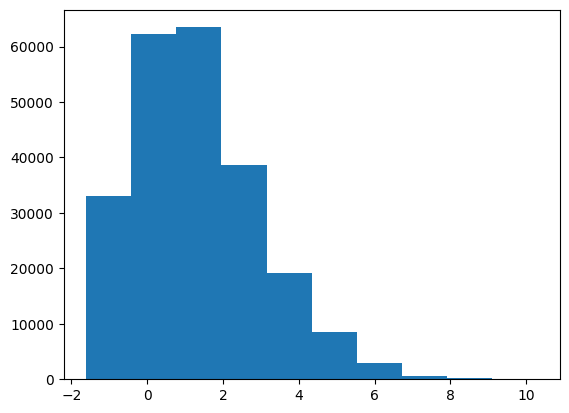

In [ ]:
Xp = X.flatten()
Xp = Xp[Xp > 0]
plt.hist(np.log(Xp))
np.max(Xp), len(Xp), V*V

In [ ]:
Xmax = 1000
eps=1e-3
lr = 0.1
beta = 0.99
epochs = 200

np.random.seed(42)

w = 2 * (np.random.rand(2*V, emb_size) - 0.5) / (emb_size + 1)
b = 2 * (np.random.rand(2*V) - 0.5) / (emb_size + 1)
g_w_s = np.ones((2 * V, emb_size), dtype=np.float32)
g_b_s = np.ones(2 * V, dtype=np.float32)
 
indexes = []
all_idx = np.arange(V)
for i in range(V):
    mask = X[i] != 0
    if np.sum(mask) == 0: continue
    for j in all_idx[mask]:
        indexes.append((i, j))
len(indexes), indexes[0:10]

(228697,
 [(4, 4),
  (4, 5),
  (4, 6),
  (4, 7),
  (4, 8),
  (4, 9),
  (4, 11),
  (4, 12),
  (4, 13),
  (4, 14)])

In [ ]:
def J():
    result = 0
    for i in range(V):
        for j in range(V):
            result += f(X[i][j]) * np.power(
                np.dot(w[i], w[j+V]) + b[i] + b[j+V] - np.log1p(X[i][j]), 2)
            
    return result

def f(x, alpha=0.75):
    if x < Xmax:
        return np.power(x / Xmax, alpha)
    else:
        return 1.0
    
def W(word):
    ww = w[word_index[word]]
    return ww / np.linalg.norm(ww)

all_js = []
for e in range(epochs):
    cost = 0
    shuffle(indexes)
    for i, jj in indexes:
        j = jj + V
        weight = f(X[i][jj])
        inner = (np.dot(w[i], w[j]) + b[i] + b[j] - np.log(X[i][jj]))
        dwi = w[j] * weight * inner
        dwj = w[i] * weight * inner
        dbi = dbj = weight * inner
        cost += weight * inner ** 2
        w[i] -= np.clip(lr * dwi / np.sqrt(g_w_s[i] + eps), -1, 1)
        w[j] -= np.clip(lr * dwj / np.sqrt(g_w_s[j] + eps), -1, 1)
        b[i] -= np.clip(lr * dbi / np.sqrt(g_b_s[i] + eps), -1, 1)
        b[j] -= np.clip(lr * dbj / np.sqrt(g_b_s[j] + eps), -1, 1)

        g_w_s[i] = beta * g_w_s[i] + np.square(dwi)
        g_w_s[j] = beta * g_w_s[j] + np.square(dwj)
        g_b_s[i] = beta * g_b_s[i] + np.square(dbi)
        g_b_s[j] = beta * g_b_s[j] + np.square(dbj)
            
    all_js.append(cost)
    
    print(e, np.round(cost, 2), np.round(W('good').dot(W('bad')), 4))

0 29978.7 0.96
1 6306.61 0.7312
2 4673.76 0.7734
3 3930.75 0.6656
4 3575.53 0.6964
5 3414.95 0.5974
6 3287.7 0.5878
7 3143.21 0.6264
8 3078.18 0.5868
9 3040.62 0.437
10 3010.33 0.5977
11 3005.79 0.5824
12 2969.58 0.4419
13 2967.89 0.4481
14 2931.86 0.4276
15 2948.27 0.3699
16 2955.48 0.2377
17 2911.93 0.3027
18 2906.78 0.3768
19 2902.77 0.0399
20 2857.9 0.1827
21 2956.64 0.3651
22 2876.25 0.2185
23 2886.31 0.226
24 2908.73 0.2327
25 2836.38 0.4753
26 2897.12 0.2324
27 2923.13 0.3834
28 2890.52 0.455
29 2871.67 0.2835
30 2912.67 0.197
31 2849.54 0.2066
32 2879.6 0.1966
33 2866.18 0.1665
34 2861.77 0.1818
35 2946.15 0.35
36 2872.07 0.2856
37 2857.89 0.2061
38 2940.61 0.3015
39 2881.55 0.5004
40 2868.95 0.3097
41 2876.45 0.3201
42 2866.94 0.3836
43 2881.56 0.4944
44 2902.43 0.4314
45 2869.15 0.2953
46 2882.85 0.3548
47 2876.21 0.3284
48 2912.74 0.2729
49 2861.83 0.4405
50 2881.59 0.4387
51 2884.03 0.1751
52 2879.5 0.1777
53 2875.59 0.2191
54 2849.6 0.3727
55 2865.17 0.402
56 2862.3 0.3916

Now explain with your own words how Glove works.  Find which word is a synonym for `positive` and an antonym for `positive`.

GloVe, or Global Vectors for Word Representation, is a word embedding technique that represents words as dense vectors in a high-dimensional space. This method captures the semantic meaning of words by leveraging the global statistical information of the corpus, unlike other methods like Word2Vec which primarily depend on local information. In other words, GloVe effectively encapsulates the co-occurrence statistics of the entire corpus into a square word-word co-occurrence matrix, allowing it to capture more nuanced meanings.

Here's how it works:

Word-Word Co-occurrence Matrix: GloVe starts by creating a word-word co-occurrence matrix X, where each element Xij represents the frequency with which word j appears in the context of word i. The context can be defined by a window around the word i.

Matrix Factorization: The aim of GloVe is to factorize this co-occurrence matrix into two smaller matrices, where each row in one matrix represents the vector representation of the corresponding word.

Objective Function: GloVe learns these vector representations by minimizing a cost function that represents the difference between the dot product of the vector representations of two words and the logarithm of the number of times these two words co-occur.

The vectors learned this way tend to place similar words close to each other and opposite words far from each other in the vector space, hence can be used to find synonyms and antonyms.



In [1]:
synonym = ('',0)
antonym = ('',1)
for word in words:
    if word != 'first':
        similarity = W(word).dot(W('first'))
        if similarity > synonym[1]:
            synonym = (word,similarity)
        if similarity < antonym[1]:
            antonym = (word,similarity)
            
print(f"Synonym for first: {synonym[0]}  Dot product: {synonym[1]}")
print(f"Antonym for first: {antonym[0]}  Dot product: {antonym[1]}")

NameError: ignored

In [ ]:
# your code goes here

that -0.8571522583437434
deal 0.8781584108127223


# 3. Convolution Based NLP

In an attempt to create our first generator network before we start using transformers, you will build a large language model using a Convolutional (causal) and Embeddings.

We will split this task into two task.

- First task is to try to predict the next word.
- Second task is to implement and train a network that will use the head to predict the sentiment of the sentence.

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
import keras
from keras import preprocessing
from keras.datasets import imdb

In [ ]:
device = 'cuda'

In [ ]:
import string

class Tokenizer:
    def __init__(self):
        self.chars = ['\00', '\01'] + sorted(list(set(string.printable)))
        self.vocab_size = len(self.chars)
        self.stoi = { ch:i for i,ch in enumerate(self.chars) }
        self.itos = { i:ch for i,ch in enumerate(self.chars) }
        
        self.itos[0] = '[START]'
        self.itos[1] = '[OOV]'
                            
    def encode(self, sentence):
        return [self.stoi[c] if c in self.stoi else 1 for c in sentence]
    
    def decode(self, indexes):
        return [self.itos[i] for i in indexes]
    
    def start(self): return '\00'

    def oov(self): return '\01'
    
tokenizer = Tokenizer()
print(tokenizer.encode('hello world'))
print(tokenizer.decode([0] + [1] + tokenizer.encode('\x96hello world')))

[79, 76, 83, 83, 86, 7, 94, 86, 89, 83, 75]
['[START]', '[OOV]', '[OOV]', 'h', 'e', 'l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd']


In [ ]:
maxlen = 1024
emb_size = 50

start_char = 1
oov_char = 2
index_from = 3

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(
    start_char=start_char, oov_char=oov_char, index_from=index_from
)

In [ ]:
word_index = imdb.get_word_index()
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = tokenizer.start()
inverted_word_index[oov_char] = tokenizer.oov()

In [ ]:
def retokenize(text):
    return [tokenizer.encode('  '.join([inverted_word_index[idx] for idx in text[i]])) 
            for i in range(len(text))]

x_train = retokenize(x_train)
x_test = retokenize(x_test)
np.array(x_train[0])

array([ 0,  7,  7, ..., 72, 83, 83])

In [ ]:
x_train_c = np.concatenate(x_train)
x_test_c = np.concatenate(x_test)
x_train_c.shape, x_test_c.shape

((38024315,), (36523678,))

In [ ]:
vocab_size = tokenizer.vocab_size

In [ ]:
class CausalConv1d(nn.Module):
    def __init__(self, embedding_size, window, dilation):
        super().__init__()
        self.conv1d = nn.Conv1d(
            embedding_size, embedding_size, 
            kernel_size=window, groups=embedding_size,
            padding=(window-1)*dilation, dilation=dilation)
        self.ln = nn.LayerNorm(embedding_size)
        
    def forward(self, x):
        # pytorch requires C to be in dimension 1
        x = x.permute(0, 2, 1) # (B, C, T)
        # we do convolution from C -> C, but with only one group
        # that means that we are doing a depthwise convolution
        # so that we use the same filter for each embedding
        x = self.conv1d(x)
        # after the convolution, we need to restore the dimension
        # and remove the extra right padding
        x = x[:, :, :-self.conv1d.padding[0]]
        x = x.permute(0, 2, 1) # (B, T, C)
        return self.ln(x)
    
class Head(nn.Module):
    def __init__(self, embedding_size, vocab_size, max_len, window, dropout):
        super().__init__()
        self.max_len = max_len
        self.wte = nn.Embedding(vocab_size, embedding_size)
        self.wpe = nn.Embedding(max_len, embedding_size)
        self.dropout = nn.Dropout(dropout)
        self.conv1d_0 = CausalConv1d(embedding_size, window, dilation=1)
        self.conv1d_1 = CausalConv1d(embedding_size, window, dilation=1)
        self.lin_0 = nn.Linear(embedding_size, embedding_size)
        self.lin_1 = nn.Linear(embedding_size, embedding_size)
        self.lin_2 = nn.Linear(embedding_size, embedding_size)
        self.ln_0 = nn.LayerNorm(embedding_size)
        self.time_shift = nn.ZeroPad2d((0,0,1,0)) # TRICK: time-mix
        
    def forward(self, idx):
        device = idx.device
        B, T = idx.shape
        
        assert T <= self.max_len

        tok_emb = self.wte(idx) # (B, T, C)
        
        B, T, C = tok_emb.shape
        
        pos = torch.arange(
            0, T, dtype=torch.long, device=device).unsqueeze(0)
        pos_emb = self.wpe(pos)
        x = self.dropout(tok_emb + pos_emb)
        x = self.ln_0(x)
        x = torch.cat([self.time_shift(x)[:,:T,:C//2], x[:,:T,C//2:]], dim=2) # TRICK: time-mix
        # idea is to do Linear C dimension
        # followed by a causal filter on the T dimension
        x = nn.GELU(approximate='tanh')(self.lin_0(x))
        x = nn.GELU(approximate='tanh')(self.conv1d_0(x))

        x = nn.GELU(approximate='tanh')(self.lin_1(x))
        x = nn.GELU(approximate='tanh')(self.conv1d_1(x))

        x = nn.GELU(approximate='tanh')(self.lin_2(x))
        return x

class LLM(nn.Module):
    def __init__(self, embedding_size, vocab_size):
        super().__init__()
        self.ln = nn.LayerNorm(embedding_size)
        self.linv = nn.Linear(embedding_size, vocab_size)
        
    def forward(self, x):
        out = self.linv(self.ln(x))
            
        return out

In [ ]:
head = Head(emb_size, vocab_size, maxlen, maxlen, 0.15)
head = head.to(device)
model = LLM(emb_size, vocab_size)
model = model.to(device)
for name, params in head.named_parameters():
    print(name, params.shape)
print()
for name, params in model.named_parameters():
    print(name, params.shape)

RuntimeError: ignored

In [ ]:
batch_size = 32

loss_f = F.cross_entropy

def get_batch(data):
    ix = torch.randint(len(data) - maxlen, (batch_size,))
    x = torch.stack([
        torch.from_numpy(data[i:i+maxlen].astype(np.int64)) for i in ix])
    y = torch.stack([
        torch.from_numpy(data[i+1:i+maxlen+1].astype(np.int64)) for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss(x_train_c, x_test_c, eval_iters=100):
    def _internal(model):
        dataset = {'train': x_train_c, 'val': x_test_c}
        out = {}
        model.eval()
        for split in ['train', 'val']:
            losses = torch.zeros(eval_iters)
            for k in range(eval_iters):
                X, Y = get_batch(dataset[split])
                p = model(head(X))
                B, T, C = p.shape
                loss = loss_f(p.view(B*T, C), Y.view(B*T))
                losses[k] = loss.item()
            out[split] = losses.mean()
        model.train()
        return out
    return _internal


In [ ]:
x1, y1 = get_batch(x_train_c)
x1[0], y1[0]

(tensor([90, 76, 83,  ..., 91, 79, 76], device='cuda:0'),
 tensor([76, 83, 93,  ..., 79, 76,  7], device='cuda:0'))

In [ ]:
import math

def get_lr_func(warmup_iters, learning_rate, lr_decay_iters,  min_lr):
    def __get_lr__(it):
        nonlocal decay_ratio
        # 1) linear warmup for warmup_iters steps
        if it < warmup_iters:
            return learning_rate * it / warmup_iters
        # 2) if it > lr_decay_iters, return min learning rate
        if it > lr_decay_iters:
            return min_lr
        # 3) in between, use cosine decay down to min learning rate
        decay_ratio = (it - warmup_iters) / (lr_decay_iters - warmup_iters)
        assert 0 <= decay_ratio <= 1
        coeff = 0.5 * (1.0 + math.cos(math.pi * decay_ratio)) # coeff ranges 0..1
        return min_lr + coeff * (learning_rate - min_lr)

    decay_ratio = 0
    return __get_lr__

learning_rate = 0.005
get_lr = get_lr_func(1000, learning_rate, 100000, learning_rate/10)

In [ ]:
iter_num = 0
logs = []

In [ ]:
epochs = 50000

params = list(head.parameters()) + list(model.parameters())
estimate_loss_f = estimate_loss(x_train_c, x_test_c)
optimizer = torch.optim.AdamW(params, lr=learning_rate)

for iter_num in range(iter_num, iter_num + epochs):
    learning_rate = get_lr(iter_num)
    for param_group in optimizer.param_groups:
        param_group['lr'] = learning_rate
    if iter_num % 1000 == 0:
        losses = estimate_loss_f(model)
        print(
            f'step {iter_num}: train loss {losses["train"]:.4f}, '
            f'val loss {losses["val"]:.4f}')
        logs.append((iter_num, losses['train'], losses['val']))
    
    xb, yb = get_batch(x_train_c)
    pb = model(head(xb))
    B, T, C = pb.shape
    loss = loss_f(pb.view(B*T, C), yb.view(B*T))

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


step 0: train loss 4.7853, val loss 4.7849


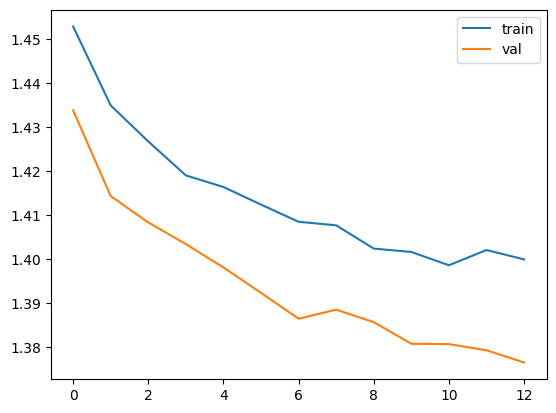

In [ ]:
plt.plot([v[1] for v in logs][3:], label='train')
plt.plot([v[2] for v in logs][3:], label='val')
plt.legend()
plt.show()

In [ ]:
x_test_c[0:20]

array([ 0,  7,  7, 87, 83, 76, 72, 90, 76,  7,  7, 78, 80, 93, 76,  7,  7,
       91, 79, 80])

In [ ]:
np.array(tokenizer.decode(x_test_c[0:20]))

array(['[START]', ' ', ' ', 'p', 'l', 'e', 'a', 's', 'e', ' ', ' ', 'g',
       'i', 'v', 'e', ' ', ' ', 't', 'h', 'i'], dtype='<U7')

In [ ]:
def generate(idx, max_new_tokens):
    for _ in range(max_new_tokens):
        idx_cond = idx[:, -maxlen:]
        logits = model(head(idx_cond))
        logits = logits[:, 0, :]
        probs = F.softmax(logits, dim=-1)
        idx_next = torch.multinomial(probs, num_samples=1)
        if idx_next == 0: break
        idx = torch.cat((idx, idx_next), dim=1)
    return idx

In [ ]:
idx = np.array([x_test_c[0:20]]).astype(np.int64)
result = generate(torch.from_numpy(idx).to(device), max_new_tokens=100).detach().cpu().numpy()
result

array([[ 0,  7,  7, 87, 83, 76, 72, 90, 76,  7,  7, 78, 80, 93, 76,  7,
         7, 91, 79, 80,  7, 86, 91,  7,  7,  7,  7, 72, 83,  7,  7,  7,
        76]])

In [ ]:
decoded_sequence = ''.join(tokenizer.decode(result[0]))
decoded_sequence

'[START]  please  give  thi ot    al   e'

In [ ]:
# Load the IMDB dataset
train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)

In [ ]:
# Split the training data into training and validation sets
train_data, valid_data = train_data.split(random_state = random.seed(SEED))